In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#Verifando o tamanho(qtde de atributos e linhas)
df.shape

(1025, 14)

In [5]:
#Obtedo os atributos
atrib = df.columns
atrib

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Criandos histogramas para todos os atributos

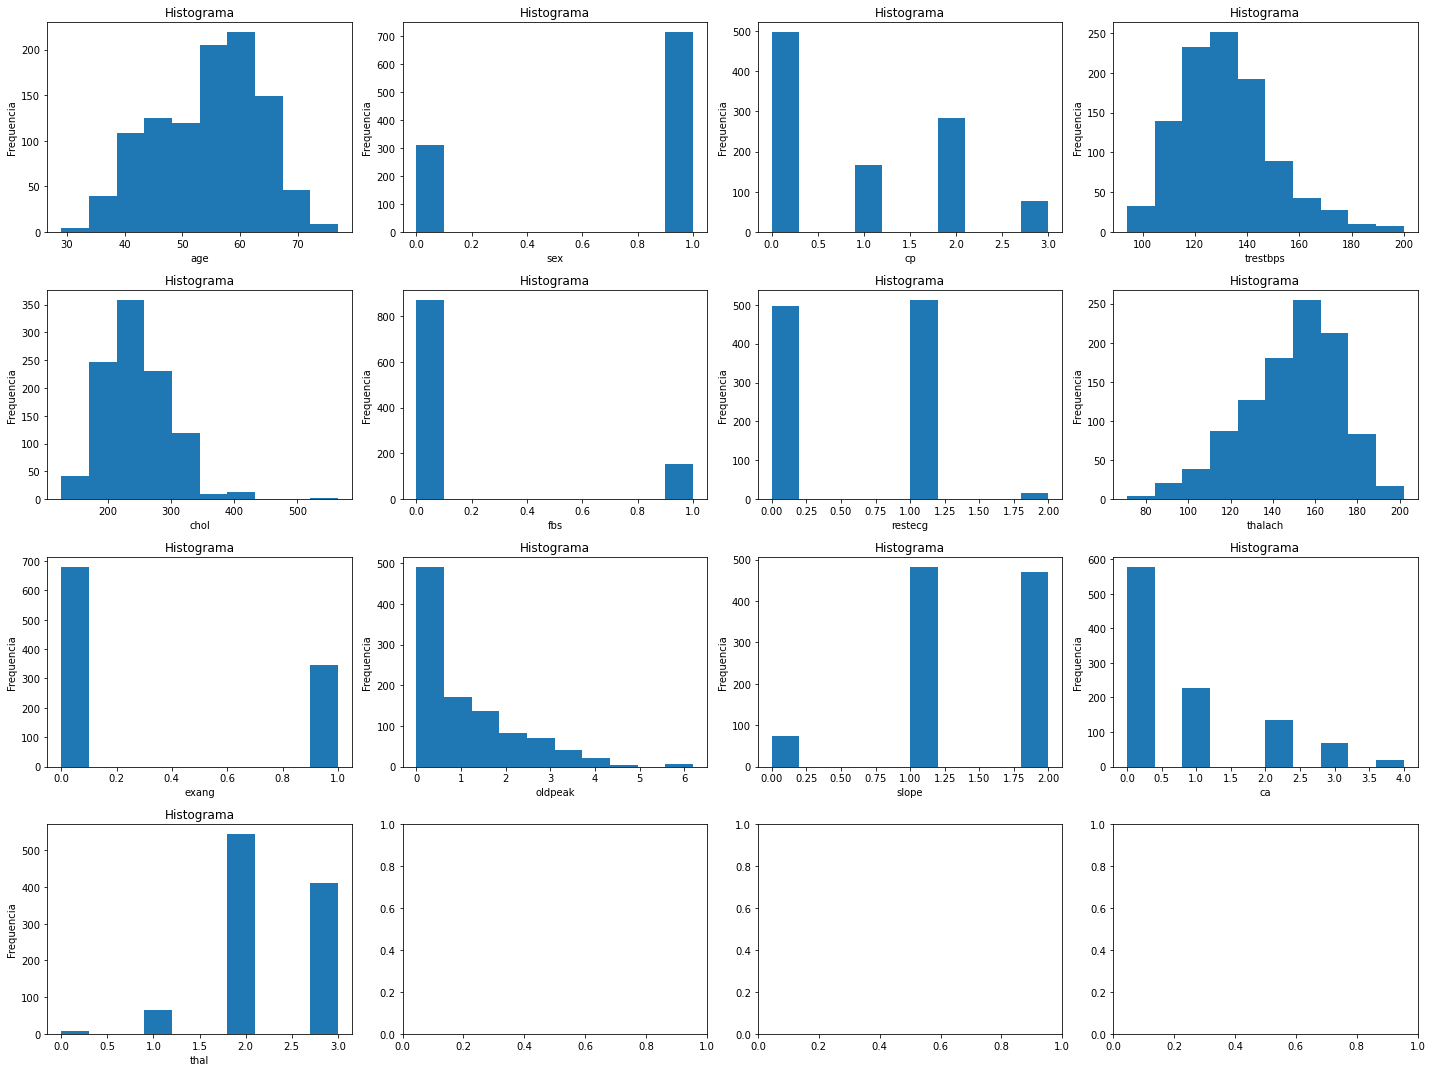

In [7]:
#5 figuras por linha 
f, ax = plt.subplots(4,4)
#Colocando lado a lado
ax = ax.flatten()
tam = len(atrib)

for column, posicao in zip(df, range(0, tam-1, 1)) :    
    ax[posicao].hist(df[column])
    ax[posicao].set_title('Histograma')
    ax[posicao].set_ylabel('Frequencia')
    ax[posicao].set_xlabel(column)

plt.tight_layout()    
plt.rcParams['figure.figsize'] = (20,15)
plt.show()    

## Apresentar a matriz de correlação Scatter plot com todos os atributos


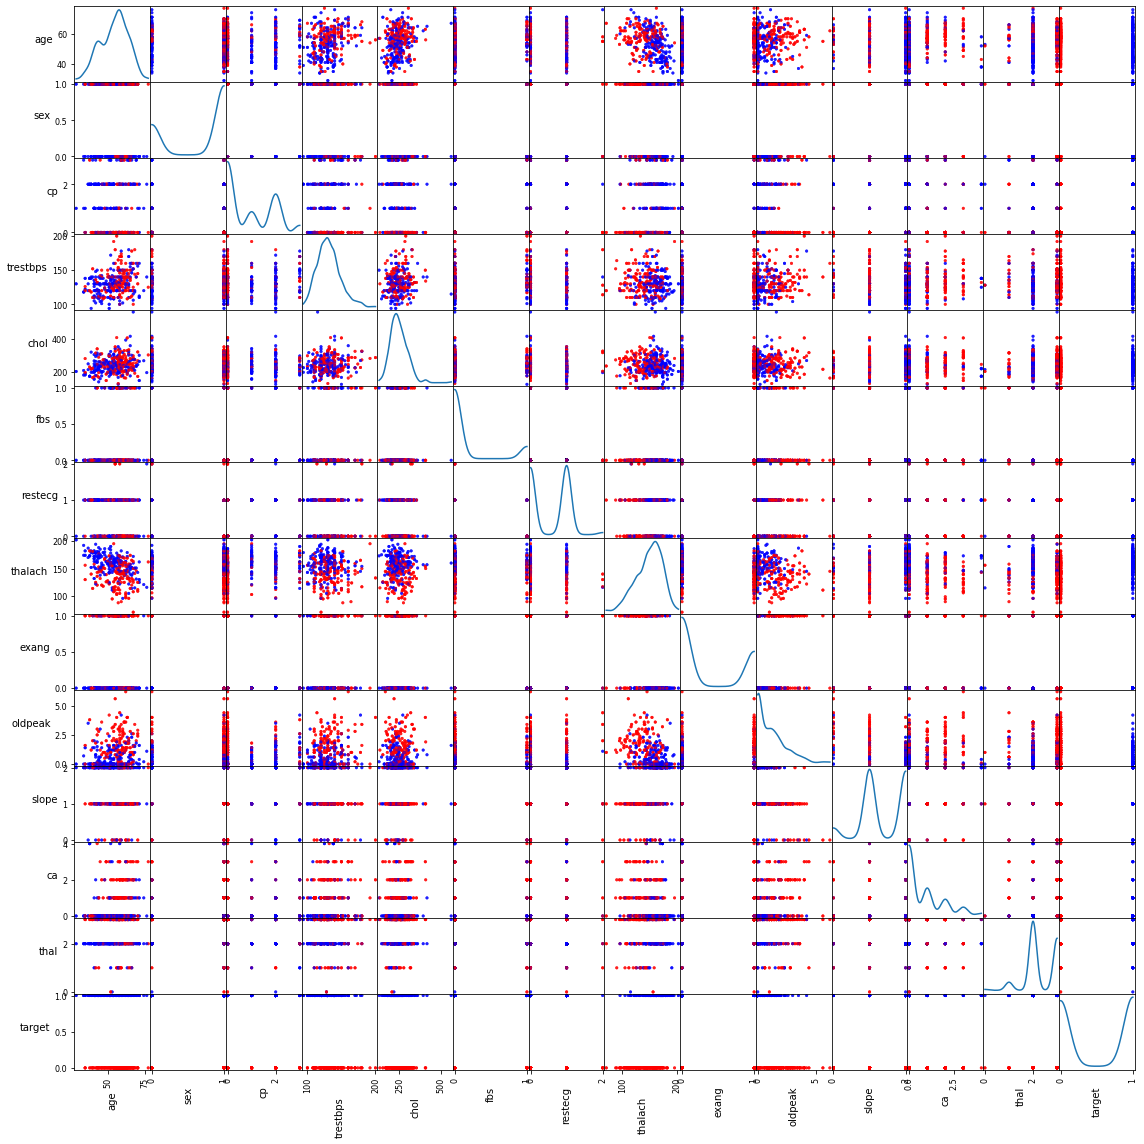

In [8]:
#Scatter Matriz
#criando um dicionario para mapear cada classe para uma cor 
classe_cor = {0 : 'red',1 : 'blue'}
#criando uma lista com as cores de cada exemplo
cores = [classe_cor[nome] for nome in df.target]
# gerando matriz de scatter plots
#pd.scatter_matrix(df_train, color=cores)
axes = pd.plotting.scatter_matrix(df, diagonal='kde', color=cores,figsize=(16,16))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

Text(0.5, 1.0, 'Correlação de Spearman')

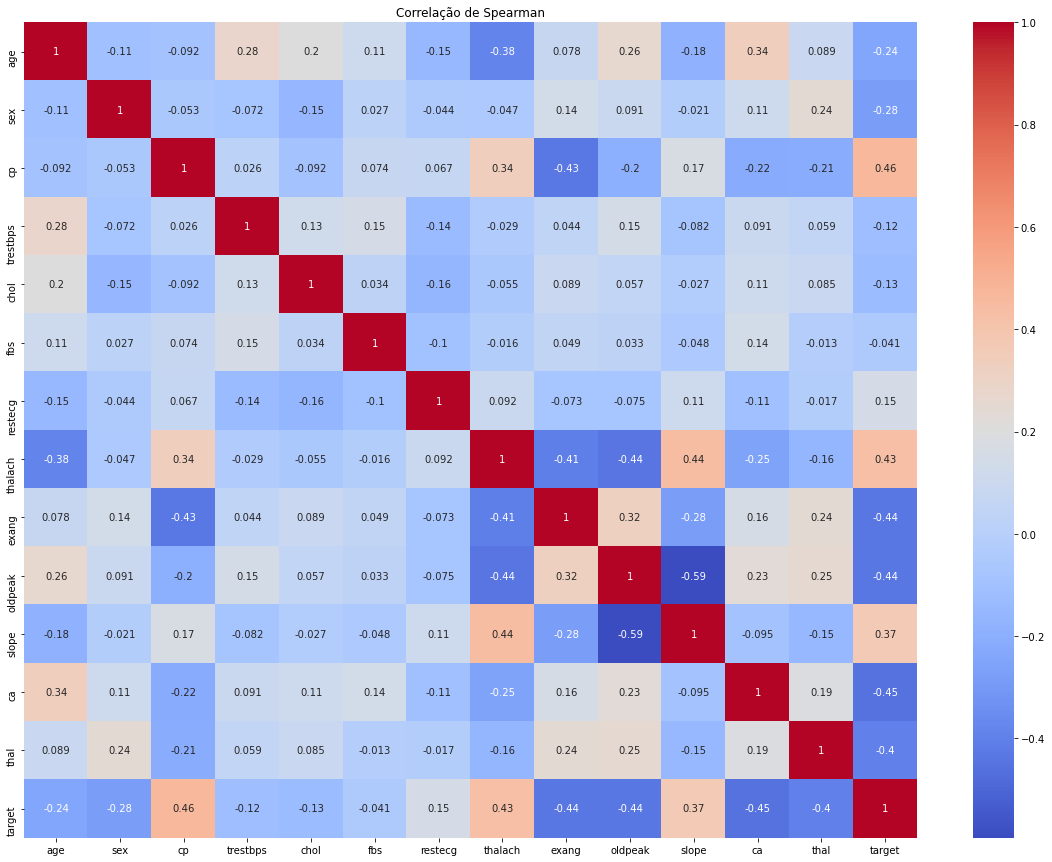

In [9]:
#Não ficou muito visível, então farei o heatmap
#Vou usar a correlação de spearman, pois calcula a correlação entre variáveis numéricas 
#(lineares ou não) ou entre variáveis qualitativas e quantitativas;
fig,ax1 = plt.subplots(figsize=(20,15))
g = sns.heatmap(df.corr(method = 'spearman'), cmap = 'coolwarm', annot = True)
g.set_title('Correlação de Spearman')

## Apresentar os gráficos tipo Scatter plot para os atributos com maior e menor correlação, respectivamente. 


### Escolhando os piores e melhores em relação ao target
    * Melhores:
        * Positiva = cp,thalach;
        * Negativa = oldpeak, ca, thal; Como o exang e oldpeak possuem os mesmo valores, vou retirar o exang;
    * Piores:
        * Positiva:restecg, slope;
        * Negativa:trestbps,chol, fbs.

### Melhores positivos

In [10]:
#Criando um DataFrame com os melhores positivos
dfPosiMelhor = pd.DataFrame(columns=['cp','thalach'],data=df[['cp','thalach']].values)

In [11]:
display(dfPosiMelhor)

,cp,thalach
0,0,168
1,0,155
2,0,125
3,0,161
4,0,106
...,...,...
1020,1,164
1021,0,141
1022,0,118
1023,0,159


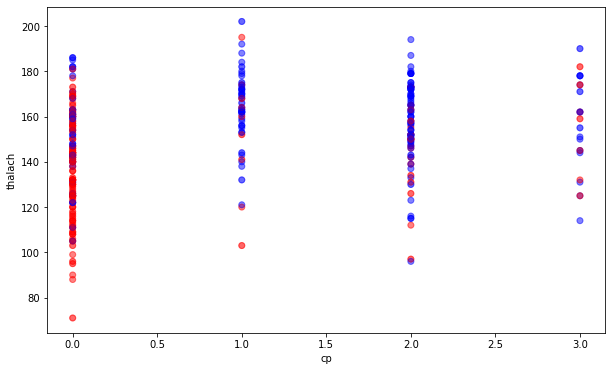

In [12]:
#Gerando o gráfico com os melhores positivos
y = df['target']
classe_cor = {0 : 'red', 1 : 'blue'}
cores = [classe_cor[nome] for nome in y]
plt.figure(figsize=(10,6))
plt.scatter(dfPosiMelhor['cp'], dfPosiMelhor['thalach'], alpha=0.2, c=cores)
plt.xlabel('cp')
plt.ylabel('thalach')
plt.show()

### Melhores negativos

In [13]:
#Criando um DataFrame com os melhores negativos
dfNegMelhor = pd.DataFrame(columns=['oldpeak', 'ca', 'thal'],data=df[['oldpeak', 'ca', 'thal']].values)

In [14]:
display(dfNegMelhor)

,oldpeak,ca,thal
0,1.0,2.0,3.0
1,3.1,0.0,3.0
2,2.6,0.0,3.0
3,0.0,1.0,3.0
4,1.9,3.0,2.0
...,...,...,...
1020,0.0,0.0,2.0
1021,2.8,1.0,3.0
1022,1.0,1.0,2.0
1023,0.0,0.0,2.0


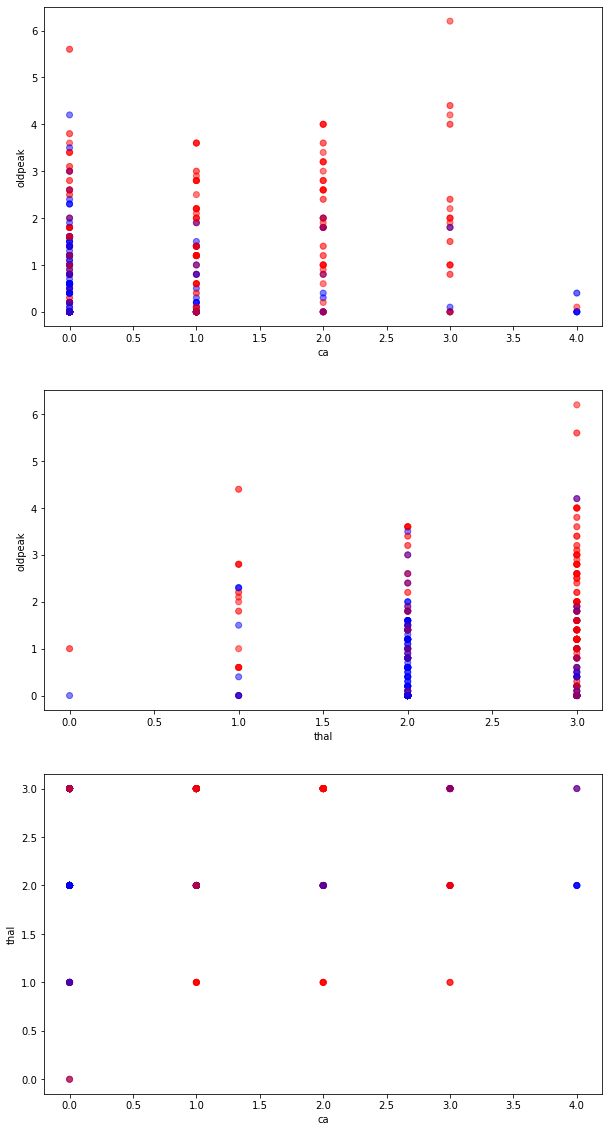

In [15]:
#Gerando o gráfico com os melhores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegMelhor['ca'], dfNegMelhor['oldpeak'], alpha=0.2, c=cores)
ax[0].set_xlabel('ca')
ax[0].set_ylabel('oldpeak')  


ax[1].scatter(dfNegMelhor['thal'], dfNegMelhor['oldpeak'], alpha=0.2, c=cores)
ax[1].set_xlabel('thal')
ax[1].set_ylabel('oldpeak')

ax[2].scatter(dfNegMelhor['ca'], dfNegMelhor['thal'], alpha=0.2, c=cores)
ax[2].set_xlabel('ca')
ax[2].set_ylabel('thal')

plt.show()



### Piores positivos

In [16]:
#Criando um DataFrame com os piores positivos
dfPosiPior = pd.DataFrame(columns=['restecg','slope'],data=df[['restecg','slope']].values)

In [17]:
dfPosiPior.head()

,restecg,slope
0,1,2
1,0,0
2,1,0
3,1,2
4,1,1


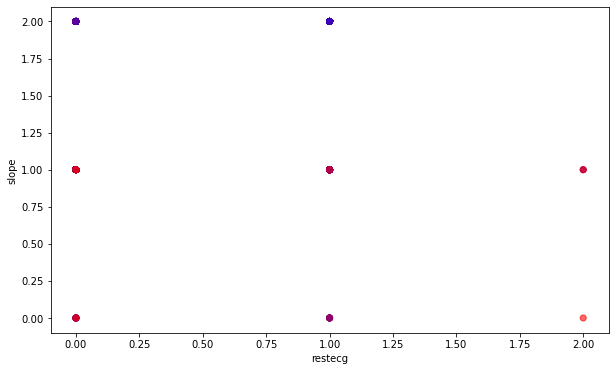

In [18]:
#Gerando o gráfico com os piores positivos
plt.figure(figsize=(10,6))
plt.scatter(dfPosiPior['restecg'], dfPosiPior['slope'], alpha=0.2, c=cores)
plt.xlabel('restecg')
plt.ylabel('slope')
plt.show()

### Piores Negativos

In [19]:
#Criando um DataFrame com os piores negativos
dfNegPior = pd.DataFrame(columns=['trestbps','chol', 'fbs'],data=df[['trestbps','chol', 'fbs']].values)

In [20]:
dfNegPior.head()

,trestbps,chol,fbs
0,125,212,0
1,140,203,1
2,145,174,0
3,148,203,0
4,138,294,1


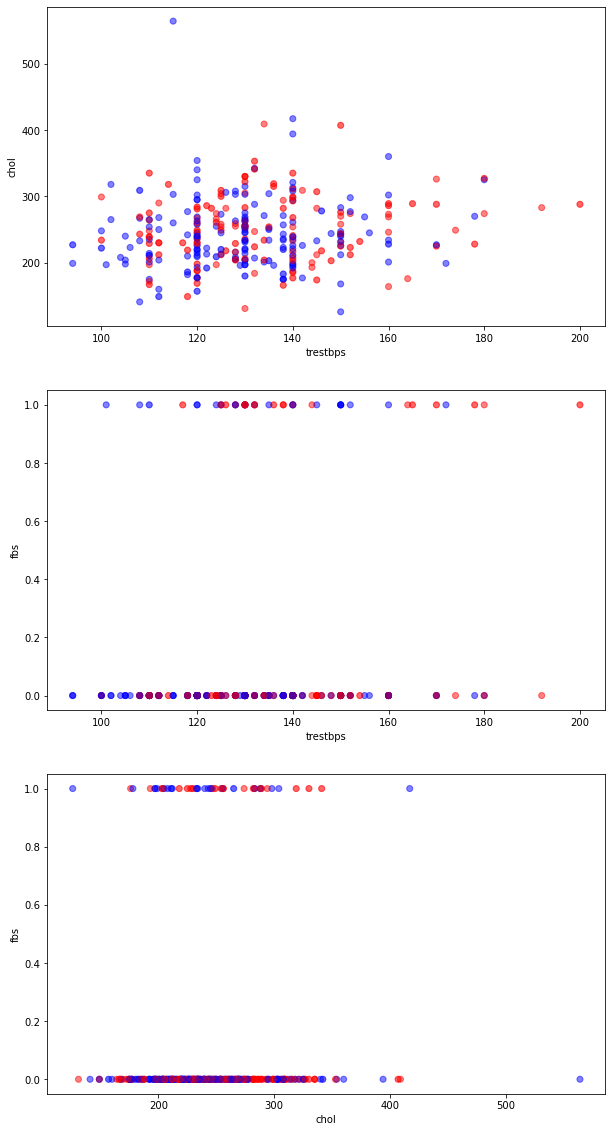

In [21]:
#Gerando o gráfico com os piores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegPior['trestbps'], dfNegPior['chol'], alpha=0.2, c=cores)
ax[0].set_xlabel('trestbps')
ax[0].set_ylabel('chol')  


ax[1].scatter(dfNegPior['trestbps'], dfNegPior['fbs'], alpha=0.2, c=cores)
ax[1].set_xlabel('trestbps')
ax[1].set_ylabel('fbs')

ax[2].scatter(dfNegPior['chol'], dfNegPior['fbs'], alpha=0.2, c=cores)
ax[2].set_xlabel('chol')
ax[2].set_ylabel('fbs')

plt.show()

## Gerar uma amostragem simples aletória de 30% e outra amostragem estratificada de 30%;


### Simples aleatóia

In [22]:
#Simples
df.shape

(1025, 14)

In [23]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [130]:
#Embota não esteja tão diferente, irei fazer o balanceamento dos dados
#Seperando os dados
X = df.drop(['target'], axis=1)
y = df['target']

In [25]:
#Instalando o pacote
#!pip install -U imbalanced-learn

In [131]:
from imblearn.over_sampling import SMOTE

In [136]:
smt = SMOTE()
X,y = smt.fit_resample(X,y) 

In [147]:
display(X)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,57,0,0,138,408,0,0,151,0,2.425018,1,2,3
1048,56,0,0,200,288,1,0,133,1,4.000000,0,2,3
1049,65,0,0,150,225,0,0,114,0,1.000000,1,3,3
1050,63,0,1,138,334,0,0,159,0,0.000000,2,0,2


In [148]:
#Verificando se funcionou
print(f'Atributos :{X.shape}')      
print(f'Classe :{y.shape}')      

Atributos :(1052, 13)
Classe :(1052,)


In [156]:
display(X)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,57,0,0,138,408,0,0,151,0,2.425018,1,2,3
1048,56,0,0,200,288,1,0,133,1,4.000000,0,2,3
1049,65,0,0,150,225,0,0,114,0,1.000000,1,3,3
1050,63,0,1,138,334,0,0,159,0,0.000000,2,0,2


In [155]:
#Gerando um DataFrame com X e y
#print(X.values)
dfSimples = pd.DataFrame(X.values, columns=X.columns)
dfSimples['target'] = y

In [157]:
display(dfSimples)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.000000,2.0,2.0,3.0,0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.100000,0.0,0.0,3.0,0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.600000,0.0,0.0,3.0,0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.000000,2.0,1.0,3.0,0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.900000,1.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,57.0,0.0,0.0,138.0,408.0,0.0,0.0,151.0,0.0,2.425018,1.0,2.0,3.0,0
1048,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.000000,0.0,2.0,3.0,0
1049,65.0,0.0,0.0,150.0,225.0,0.0,0.0,114.0,0.0,1.000000,1.0,3.0,3.0,0
1050,63.0,0.0,1.0,138.0,334.0,0.0,0.0,159.0,0.0,0.000000,2.0,0.0,2.0,0


In [158]:
#verificando a quantidade
dfSimples['target'].value_counts()

0    526
1    526
Name: target, dtype: int64

In [159]:
dfSimples = dfSimples.sample(frac = 0.30)

In [160]:
dfSimples.shape

(316, 14)

In [182]:
#Gerando a estatística
dfSimples.describe().T

,count,mean,std,min,25%,50%,75%,max
age,316.0,54.712025,9.396858,34.0,47.0,55.0,62.0,77.0
sex,316.0,0.674051,0.469472,0.0,0.0,1.0,1.0,1.0
cp,316.0,0.886076,1.014027,0.0,0.0,0.0,2.0,3.0
trestbps,316.0,132.110759,18.063831,94.0,120.0,130.0,140.0,200.0
chol,316.0,248.009494,50.914711,131.0,213.0,240.5,278.0,564.0
fbs,316.0,0.174051,0.379754,0.0,0.0,0.0,0.0,1.0
restecg,316.0,0.544304,0.553143,0.0,0.0,1.0,1.0,2.0
thalach,316.0,148.382911,22.681135,71.0,132.0,151.0,165.0,195.0
exang,316.0,0.319620,0.467069,0.0,0.0,0.0,1.0,1.0
oldpeak,316.0,1.169495,1.210931,0.0,0.0,1.0,1.8,6.2


### Melhores Positivos

In [162]:
#Criando um DataFrame com os melhores positivos
dfPosiMelhorSimples = pd.DataFrame(columns=['cp','thalach'],data=dfSimples[['cp','thalach']].values)

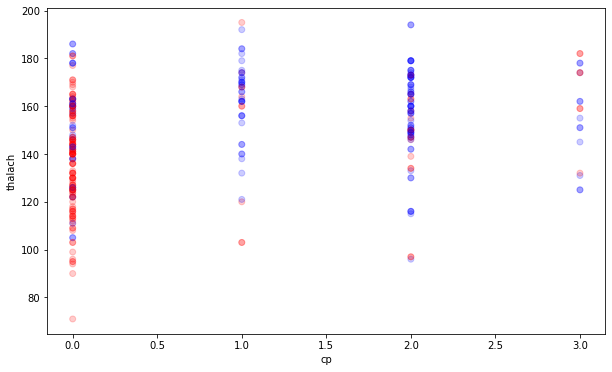

In [163]:
#Gerando o gráfico com os melhores positivos
target = dfSimples['target']
classe_cor = {0 : 'red', 1 : 'blue'}
cores = [classe_cor[nome] for nome in target]
plt.figure(figsize=(10,6))
plt.scatter(dfPosiMelhorSimples['cp'], dfPosiMelhorSimples['thalach'], alpha=0.2, c=cores)
plt.xlabel('cp')
plt.ylabel('thalach')
plt.show()


### Melhores Negativos

In [164]:
#Criando um DataFrame com os melhores negativos
dfNegMelhorSimples = pd.DataFrame(columns=['oldpeak', 'ca', 'thal'],data=dfSimples[['oldpeak', 'ca', 'thal']].values)

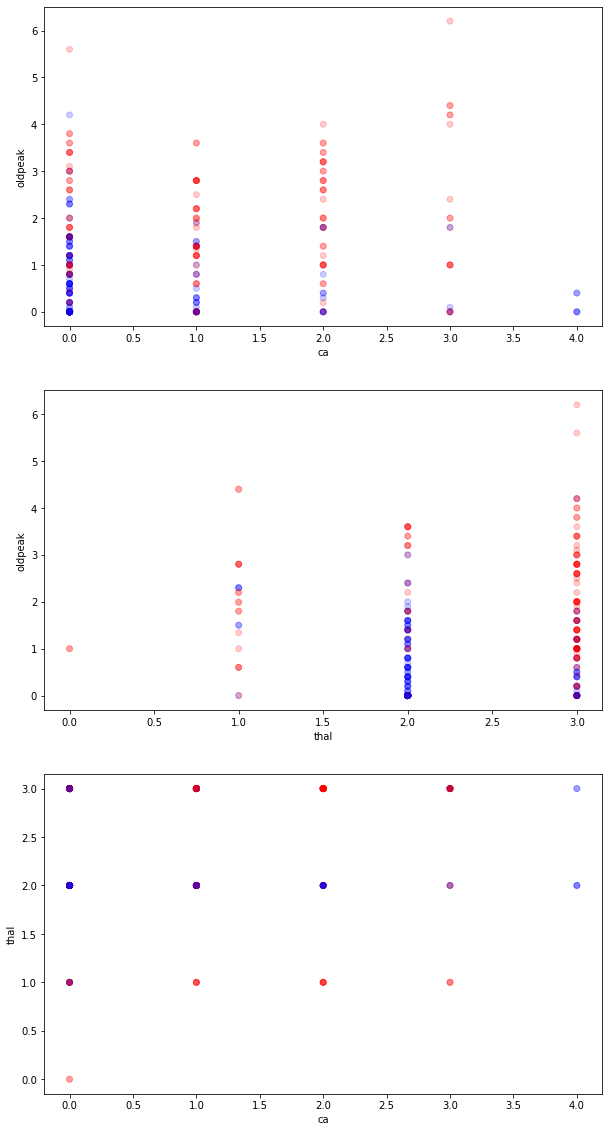

In [165]:
#Gerando o gráfico com os melhores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegMelhorSimples['ca'], dfNegMelhorSimples['oldpeak'], alpha=0.2, c=cores)
ax[0].set_xlabel('ca')
ax[0].set_ylabel('oldpeak')  


ax[1].scatter(dfNegMelhorSimples['thal'], dfNegMelhorSimples['oldpeak'], alpha=0.2, c=cores)
ax[1].set_xlabel('thal')
ax[1].set_ylabel('oldpeak')

ax[2].scatter(dfNegMelhorSimples['ca'], dfNegMelhorSimples['thal'], alpha=0.2, c=cores)
ax[2].set_xlabel('ca')
ax[2].set_ylabel('thal')

plt.show()


### Piores Positivos

In [166]:
#Criando um DataFrame com os piores positivos
dfPosiPiorSimples = pd.DataFrame(columns=['restecg','slope'],data=dfSimples[['restecg','slope']].values)

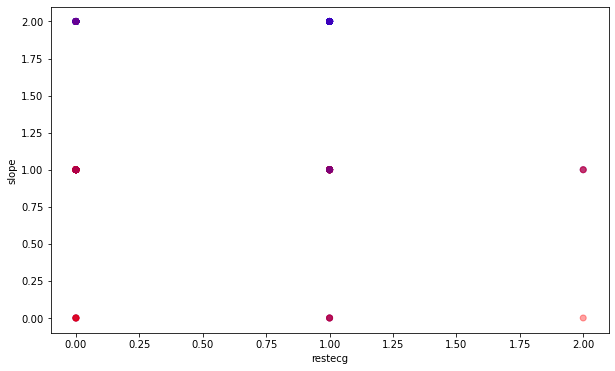

In [167]:
#Gerando o gráfico com os piores positivos
plt.figure(figsize=(10,6))
plt.scatter(dfPosiPiorSimples['restecg'], dfPosiPiorSimples['slope'], alpha=0.2, c=cores)
plt.xlabel('restecg')
plt.ylabel('slope')
plt.show()

### Piores Negativos

In [168]:
#Criando um DataFrame com os piores negativos
dfNegPiorSimples = pd.DataFrame(columns=['trestbps','chol', 'fbs'],data=dfSimples[['trestbps','chol', 'fbs']].values)

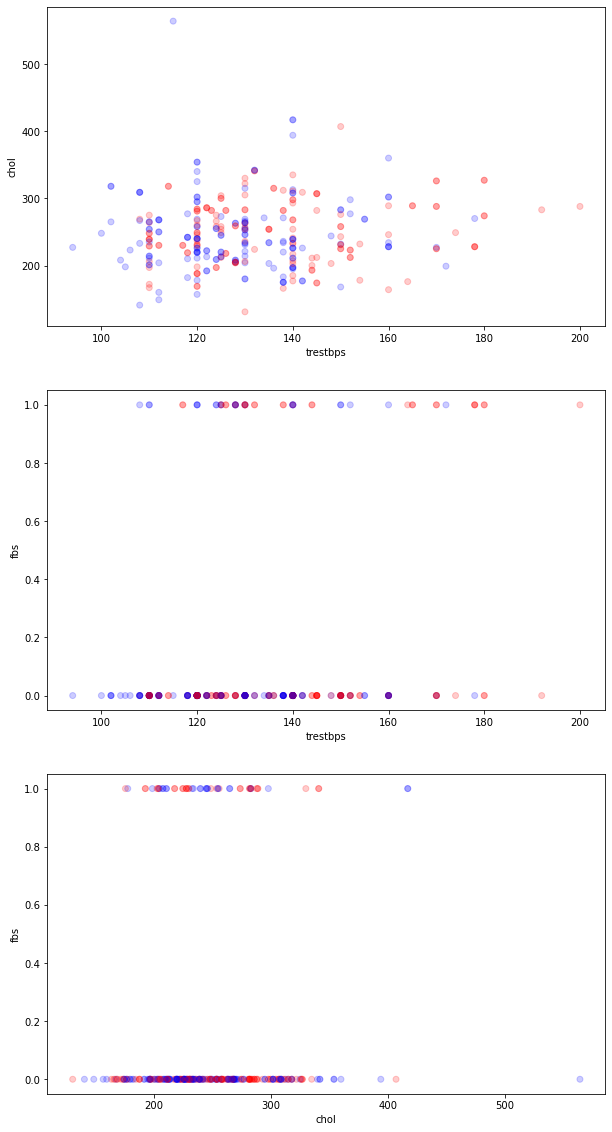

In [169]:
#Gerando o gráfico com os piores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegPiorSimples['trestbps'], dfNegPiorSimples['chol'], alpha=0.2, c=cores)
ax[0].set_xlabel('trestbps')
ax[0].set_ylabel('chol')  


ax[1].scatter(dfNegPiorSimples['trestbps'], dfNegPiorSimples['fbs'], alpha=0.2, c=cores)
ax[1].set_xlabel('trestbps')
ax[1].set_ylabel('fbs')

ax[2].scatter(dfNegPiorSimples['chol'], dfNegPiorSimples['fbs'], alpha=0.2, c=cores)
ax[2].set_xlabel('chol')
ax[2].set_ylabel('fbs')

plt.show()


### Estratificada


In [170]:
from sklearn.model_selection import train_test_split

In [172]:
# Gerando a amostra de teste estratificada:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30)

In [173]:
X_test.shape

(316, 13)

In [100]:
type(y_test)

pandas.core.series.Series

In [192]:
y_test.isnull().sum()

0

In [196]:
#Gerar um novo DataFrame
dfEst = pd.DataFrame(X_test.values, columns = X_test.columns)

In [199]:
dfEst['target'] = y_test.values

In [200]:
dfEst.shape

(316, 14)

In [201]:
display(dfEst)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,0.0,120.0,237.0,0.0,1.0,71.0,0.0,1.0,1.0,0.0,2.0,0
1,58.0,1.0,0.0,125.0,300.0,0.0,0.0,171.0,0.0,0.0,2.0,2.0,3.0,0
2,44.0,1.0,0.0,120.0,169.0,0.0,1.0,144.0,1.0,2.8,0.0,0.0,1.0,0
3,65.0,0.0,2.0,140.0,417.0,1.0,0.0,157.0,0.0,0.8,2.0,1.0,2.0,1
4,56.0,1.0,0.0,132.0,184.0,0.0,0.0,105.0,1.0,2.1,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,0
312,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0
313,64.0,1.0,0.0,120.0,246.0,0.0,0.0,96.0,1.0,2.2,0.0,1.0,2.0,0
314,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0


In [204]:
dfEst['target'].isnull().sum()

0

In [206]:
#Gerando a estatística
dfEst.describe().T

,count,mean,std,min,25%,50%,75%,max
age,316.0,54.265823,8.768933,34.0,47.75,56.000000,60.000000,71.0
sex,316.0,0.693038,0.461965,0.0,0.00,1.000000,1.000000,1.0
cp,316.0,0.892405,1.020958,0.0,0.00,0.000000,2.000000,3.0
trestbps,316.0,133.221519,17.610287,94.0,120.00,130.000000,140.000000,200.0
chol,316.0,244.098101,49.276414,126.0,208.75,238.000000,273.000000,417.0
fbs,316.0,0.145570,0.353234,0.0,0.00,0.000000,0.000000,1.0
restecg,316.0,0.541139,0.523920,0.0,0.00,1.000000,1.000000,2.0
thalach,316.0,147.341772,24.112770,71.0,132.00,151.000000,164.000000,195.0
exang,316.0,0.313291,0.464567,0.0,0.00,0.000000,1.000000,1.0
oldpeak,316.0,1.031831,1.173752,0.0,0.00,0.767595,1.712174,6.2


### Melhores Positivos

In [207]:
#Criando um DataFrame com os melhores positivos
dfPosiMelhorEst = pd.DataFrame(columns=['cp','thalach'],data=dfEst[['cp','thalach']].values)

In [208]:
display(dfPosiMelhorEst)

,cp,thalach
0,0.0,71.0
1,0.0,171.0
2,0.0,144.0
3,2.0,157.0
4,0.0,105.0
...,...,...
311,0.0,108.0
312,0.0,168.0
313,0.0,96.0
314,0.0,140.0


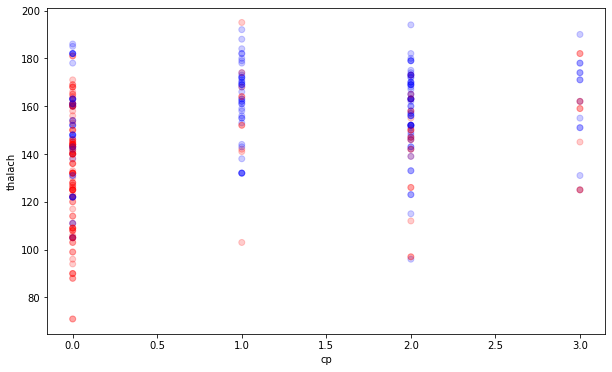

In [209]:
#Gerando o gráfico com os melhores positivos
target = dfEst['target']
classe_cor = {0 : 'red', 1 : 'blue'}
cores = [classe_cor[nome] for nome in target]
plt.figure(figsize=(10,6))
plt.scatter(dfPosiMelhorEst['cp'], dfPosiMelhorEst['thalach'], alpha=0.2, c=cores)
plt.xlabel('cp')
plt.ylabel('thalach')
plt.show()

### Melhores Negativos

In [210]:
#Criando um DatFrame com os melhores negativos
dfNegMelhorEst = pd.DataFrame(columns=['oldpeak', 'ca', 'thal'],data=dfEst[['oldpeak', 'ca', 'thal']].values)

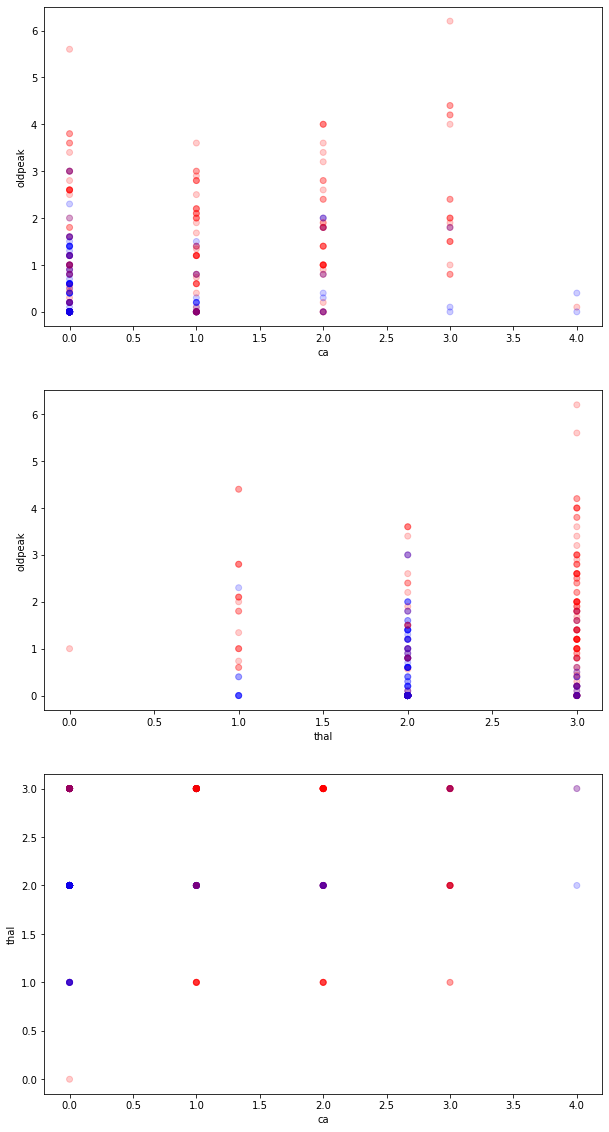

In [211]:
#Gerando o gráfico com os melhores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegMelhorEst['ca'], dfNegMelhorEst['oldpeak'], alpha=0.2, c=cores)
ax[0].set_xlabel('ca')
ax[0].set_ylabel('oldpeak')

ax[1].scatter(dfNegMelhorEst['thal'], dfNegMelhorEst['oldpeak'], alpha=0.2, c=cores)
ax[1].set_xlabel('thal')
ax[1].set_ylabel('oldpeak')

ax[2].scatter(dfNegMelhorEst['ca'], dfNegMelhorEst['thal'], alpha=0.2, c=cores)
ax[2].set_xlabel('ca')
ax[2].set_ylabel('thal')

plt.show()

### Piores Positivos

In [212]:
#Criando um DataFrame com os piores positivos
dfPosiPiorEst = pd.DataFrame(columns=['restecg','slope'],data=dfEst[['restecg','slope']].values)

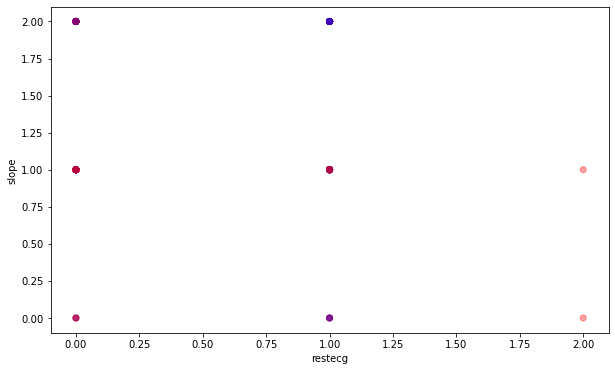

In [213]:
#Gerando o gráfico com os piores positivos
plt.figure(figsize=(10,6))
plt.scatter(dfPosiPiorEst['restecg'], dfPosiPiorEst['slope'], alpha=0.2, c=cores)
plt.xlabel('restecg')
plt.ylabel('slope')
plt.show()

### Piores negativos

In [214]:
#Criando uma lista com os piores negativos
dfNegPiorEst = pd.DataFrame(columns=['trestbps','chol', 'fbs'],data=dfEst[['trestbps','chol', 'fbs']].values)

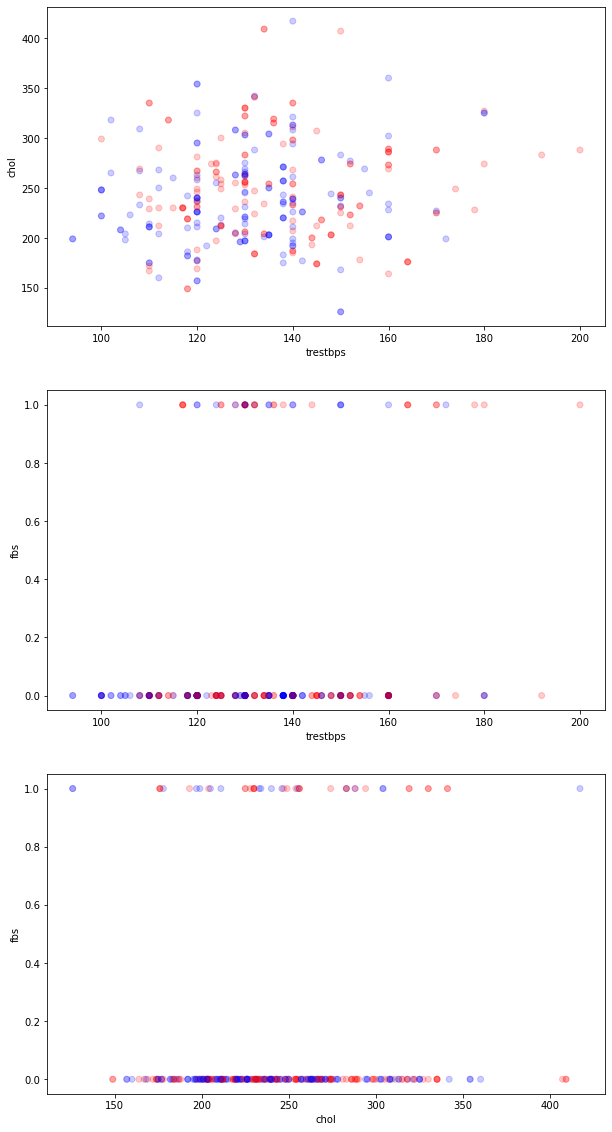

In [215]:
#Gerando o gráfico com os piores negativos
f, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(dfNegPiorEst['trestbps'], dfNegPiorEst['chol'], alpha=0.2, c=cores)
ax[0].set_xlabel('trestbps')
ax[0].set_ylabel('chol')  


ax[1].scatter(dfNegPiorEst['trestbps'], dfNegPiorEst['fbs'], alpha=0.2, c=cores)
ax[1].set_xlabel('trestbps')
ax[1].set_ylabel('fbs')

ax[2].scatter(dfNegPiorEst['chol'], dfNegPiorEst['fbs'], alpha=0.2, c=cores)
ax[2].set_xlabel('chol')
ax[2].set_ylabel('fbs')
plt.show()

## Verificar se a amostragem utilizada consegue representar o conjunto total dos dados.


### Ao analisar os campos "thal" e "oldpeak" (negativos melhores) há uma diferença no gráfico scatter plot em relação aos dados sem amostragem. Em comparação com os dados com amostragem, tanto aleatória simples e estratificado não há diferença.

### Também foi observado essa mesma divergência nos campos "trestbps" e "chol"(piores negativos) ao comparar os dados de amostagem com os sem amostagem. Ademais, não foi observado nenhuma diferença  entre os dados com amostragem, tanto aleatória simples e estratificado para esse conjunto de dados.